In [1]:
# Import necessary libraries
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import ShuffleSplit

In [2]:
# Load the data
data = pd.read_csv('C:/Users/Mohit/OneDrive/Desktop/geopathic/geopathic_stress_data.csv')

In [3]:
# Data exploration
print(data.head())
print(data.info())
print(data.describe())


  magnetic_field  conductivity  water_flow  heart_rate  blood_pressure  \
0           0.45           5.2         0.8        75.0           120.0   
1           0.30           4.8         0.6        70.0           115.0   
2           0.55           5.0         0.9        80.0           130.0   
3           0.45           5.2         0.8        75.0           120.0   
4           0.30           4.8         0.6        70.0           115.0   

   gs_zone  
0      1.0  
1      0.0  
2      1.0  
3      1.0  
4      0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   magnetic_field  337 non-null    object 
 1   conductivity    336 non-null    float64
 2   water_flow      336 non-null    float64
 3   heart_rate      336 non-null    float64
 4   blood_pressure  336 non-null    float64
 5   gs_zone         336 non-null    float64
dtypes: float

In [4]:
# Handle missing values
data = data.dropna()

In [5]:
# Convert categorical data to numeric if necessary
# Assuming 'location' is a categorical feature, we will encode it
if 'location' in data.columns:
    data['location'] = data['location'].astype('category').cat.codes

In [6]:
# Ensure all data is numeric
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')
        data = data.dropna()

In [7]:
# Feature selection
features = ['magnetic_field', 'conductivity', 'water_flow', 'heart_rate', 'blood_pressure']
X = data[features]
y = data['gs_zone']

In [8]:
# Normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Check if dataset size is sufficient for cross-validation
n_splits = 3 if len(data) < 5 else 5

In [11]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9900990099009901
Confusion Matrix:
 [[43  0]
 [ 1 57]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        43
         1.0       1.00      0.98      0.99        58

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [13]:
# Create ShuffleSplit cross-validator
shuffle_split = ShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

In [14]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=shuffle_split)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}')

Cross-validation scores: [0.96428571]
Mean cross-validation score: 0.9642857142857143


In [15]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

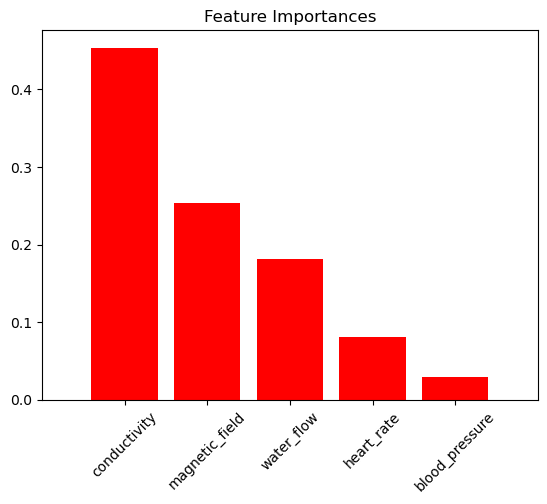

In [16]:
# Plot feature importance
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
# Save the trained model
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']